In [22]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from catboost import CatBoostClassifier

In [3]:
df_train = pd.read_csv('../data/processed/train.csv')
df_val = pd.read_csv('../data/processed/val.csv')

In [4]:
df_train.columns

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC',
       'Errors?', 'Is Fraud?', 'Hour', 'Minute', 'Date', 'Day of Week'],
      dtype='object')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5133655 entries, 0 to 5133654
Data columns (total 18 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Amount          float64
 6   Use Chip        object 
 7   Merchant Name   int64  
 8   Merchant City   object 
 9   Merchant State  object 
 10  Zip             float64
 11  MCC             int64  
 12  Errors?         object 
 13  Is Fraud?       int64  
 14  Hour            int64  
 15  Minute          int64  
 16  Date            object 
 17  Day of Week     object 
dtypes: float64(2), int64(10), object(6)
memory usage: 705.0+ MB


In [7]:
cat_features = ["User", "Card", "Merchant Name", "Merchant City", "Merchant State", 'MCC', "Zip", 
                'Year', 'Month', 'Day', 'Use Chip', 'Hour', 'Day of Week']
num_features = ['Amount']
target = 'Is Fraud?'

In [8]:
for column in cat_features:
    df_train[column] = df_train[column].astype('object')
    df_val[column] = df_val[column].astype('object')

In [9]:
y_train = df_train[target]
y_val = df_val[target]

In [10]:
X_train = df_train[cat_features + num_features]
X_val = df_val[cat_features + num_features]

In [13]:
X_train['Merchant State']=X_train['Merchant State'].fillna('unknown')
X_train['Zip']=X_train['Merchant State'].fillna('0')

C:\Users\lakeo\AppData\Local\Temp\ipykernel_12400\3754502966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Merchant State']=X_train['Merchant State'].fillna('unknown')
C:\Users\lakeo\AppData\Local\Temp\ipykernel_12400\3754502966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Zip']=X_train['Merchant State'].fillna('0')


In [15]:
X_val['Merchant State']=X_val['Merchant State'].fillna('unknown')
X_val['Zip']=X_val['Merchant State'].fillna('0')

C:\Users\lakeo\AppData\Local\Temp\ipykernel_12400\2161902591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['Merchant State']=X_val['Merchant State'].fillna('unknown')
C:\Users\lakeo\AppData\Local\Temp\ipykernel_12400\2161902591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['Zip']=X_val['Merchant State'].fillna('0')


In [16]:
from catboost import CatBoostClassifier

In [17]:
clf = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1
)

clf.fit(X_train, y_train,
       cat_features=cat_features,
       eval_set=(X_val, y_val),
       verbose=5)

0:	learn: 0.5986651	test: 0.5986773	best: 0.5986773 (0)	total: 606ms	remaining: 60s
5:	learn: 0.3156190	test: 0.3156795	best: 0.3156795 (5)	total: 2.87s	remaining: 45s
10:	learn: 0.1801225	test: 0.1802244	best: 0.1802244 (10)	total: 4.2s	remaining: 34s
15:	learn: 0.1072839	test: 0.1173799	best: 0.1173799 (15)	total: 5.74s	remaining: 30.1s
20:	learn: 0.0658414	test: 0.0787205	best: 0.0787205 (20)	total: 7.62s	remaining: 28.7s
25:	learn: 0.0416213	test: 0.0481051	best: 0.0481051 (25)	total: 10.4s	remaining: 29.6s
30:	learn: 0.0274392	test: 0.0302148	best: 0.0302148 (30)	total: 13.1s	remaining: 29.1s
35:	learn: 0.0188528	test: 0.0197311	best: 0.0197311 (35)	total: 15.8s	remaining: 28s
40:	learn: 0.0137664	test: 0.0131665	best: 0.0131665 (40)	total: 18.5s	remaining: 26.6s
45:	learn: 0.0104668	test: 0.0092354	best: 0.0092354 (45)	total: 21.3s	remaining: 25s
50:	learn: 0.0085963	test: 0.0067889	best: 0.0067889 (50)	total: 24.1s	remaining: 23.1s
55:	learn: 0.0074457	test: 0.0054839	best: 0.00

In [20]:
preds_val = clf.predict(data=X_val)

In [21]:
print(classification_report(y_val, preds_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1719124
           1       0.88      0.50      0.63      2491

    accuracy                           1.00   1721615
   macro avg       0.94      0.75      0.82   1721615
weighted avg       1.00      1.00      1.00   1721615



In [23]:
print(confusion_matrix(y_val, preds_val))

[[1718958     166]
 [   1257    1234]]


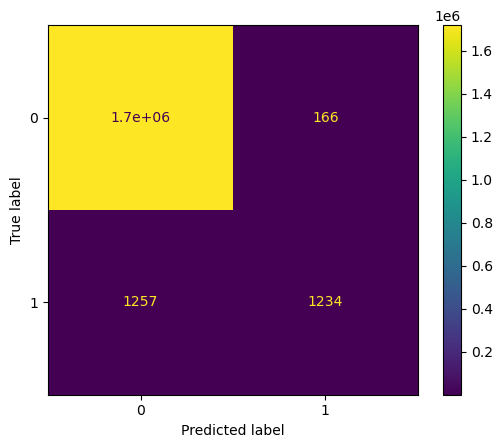

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, preds_val))
disp.plot()
plt.show()

In [27]:
from sklearn.metrics import roc_auc_score

In [28]:
roc_auc_score(y_val, preds_val)

0.7476434096810284

In [29]:
df_test = pd.read_csv('../data/processed/test.csv')

In [30]:
y_test = df_test[target]

In [32]:
for column in cat_features:
    df_test[column] = df_test[column].astype('object')

In [33]:
X_test = df_test[cat_features + num_features]

In [35]:
X_test['Merchant State']=X_test['Merchant State'].fillna('unknown')
X_test['Zip']=X_test['Merchant State'].fillna('0')

C:\Users\lakeo\AppData\Local\Temp\ipykernel_12400\2426568702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Merchant State']=X_test['Merchant State'].fillna('unknown')
C:\Users\lakeo\AppData\Local\Temp\ipykernel_12400\2426568702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Zip']=X_test['Merchant State'].fillna('0')


In [36]:
preds_test = clf.predict(data=X_test)

In [37]:
print(classification_report(y_test, preds_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1721851
           1       0.87      0.51      0.65      2087

    accuracy                           1.00   1723938
   macro avg       0.94      0.76      0.82   1723938
weighted avg       1.00      1.00      1.00   1723938



In [38]:
print(confusion_matrix(y_test, preds_test))

[[1721695     156]
 [   1014    1073]]


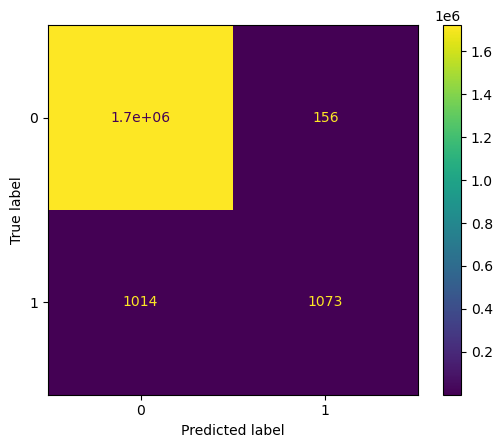

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, preds_test))
disp.plot()
plt.show()

In [41]:
roc_auc_score(y_test, preds_test)

0.757022261005536

In [44]:
X_test.Fraud = y_test
X_test.Prediction = preds_test
X_test[(X_test.Fraud == 1) & (X_test.Prediction == 1)].Amount.sum()

C:\Users\lakeo\AppData\Local\Temp\ipykernel_12400\3997830718.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_test.Fraud = y_test


99275.81

In [45]:
X_test[(X_test.Fraud == 1)].Amount.sum()

165754.86

In [46]:
X_test[(X_test.Fraud == 1) & (X_test.Prediction == 1)].Amount.sum() / X_test[(X_test.Fraud == 1)].Amount.sum()

0.5989315185087183

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

In [87]:
X_test['Fraud'] = y_test

/var/folders/4k/mwht33nx1y3874hyv4dvd6x00000gn/T/ipykernel_7167/2607284807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Fraud'] = y_test


In [90]:
X_test[(X_test.Fraud == 1) & (X_test.Prediction == 1)].Amount.sum()

160169.75

In [91]:
X_test[(X_test.Fraud == 1)].Amount.sum()

165754.86

In [93]:
## Dealing with imbalanced classes

In [94]:
clf2 = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    auto_class_weights='Balanced'
)

clf2.fit(X_train, y_train,
       cat_features=cat_features,
       eval_set=(X_val, y_val),
       verbose=5)

0:	learn: 0.6070994	test: 0.6066060	best: 0.6066060 (0)	total: 297ms	remaining: 29.4s
5:	learn: 0.3552831	test: 0.3516511	best: 0.3516511 (5)	total: 923ms	remaining: 14.5s
10:	learn: 0.2303576	test: 0.2258084	best: 0.2258084 (10)	total: 1.54s	remaining: 12.5s
15:	learn: 0.1647393	test: 0.1599316	best: 0.1599316 (15)	total: 2.14s	remaining: 11.3s
20:	learn: 0.1143719	test: 0.1122591	best: 0.1122591 (20)	total: 2.84s	remaining: 10.7s
25:	learn: 0.0872219	test: 0.0862086	best: 0.0862086 (25)	total: 3.52s	remaining: 10s
30:	learn: 0.0717701	test: 0.0717308	best: 0.0717308 (30)	total: 4.27s	remaining: 9.51s
35:	learn: 0.0605523	test: 0.0530054	best: 0.0530054 (35)	total: 4.94s	remaining: 8.78s
40:	learn: 0.0539769	test: 0.0475722	best: 0.0475722 (40)	total: 5.61s	remaining: 8.08s
45:	learn: 0.0478240	test: 0.0426005	best: 0.0426005 (45)	total: 6.37s	remaining: 7.48s
50:	learn: 0.0436561	test: 0.0393330	best: 0.0393330 (50)	total: 7.04s	remaining: 6.76s
55:	learn: 0.0414151	test: 0.0377466	b

In [95]:
preds2 = clf2.predict(data=X_test)

In [96]:
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1721851
           1       0.12      1.00      0.21      2087

    accuracy                           0.99   1723938
   macro avg       0.56      1.00      0.60   1723938
weighted avg       1.00      0.99      0.99   1723938



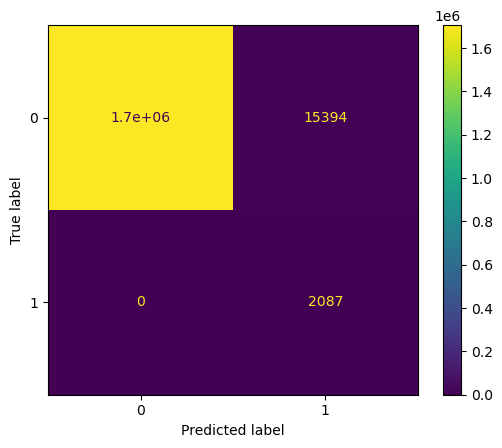

In [97]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, preds2))
disp.plot()
plt.show()

In [98]:
clf3 = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    auto_class_weights='SqrtBalanced'
)

clf3.fit(X_train, y_train,
       cat_features=cat_features,
       eval_set=(X_val, y_val),
       verbose=5)

0:	learn: 0.6079267	test: 0.6081116	best: 0.6081116 (0)	total: 257ms	remaining: 25.4s
5:	learn: 0.3362484	test: 0.3366039	best: 0.3366039 (5)	total: 825ms	remaining: 12.9s
10:	learn: 0.1909648	test: 0.1909251	best: 0.1909251 (10)	total: 1.45s	remaining: 11.7s
15:	learn: 0.1140746	test: 0.1138350	best: 0.1138350 (15)	total: 2s	remaining: 10.5s
20:	learn: 0.0708890	test: 0.0705109	best: 0.0705109 (20)	total: 2.54s	remaining: 9.57s
25:	learn: 0.0459651	test: 0.0454927	best: 0.0454927 (25)	total: 3.22s	remaining: 9.17s
30:	learn: 0.0313242	test: 0.0308536	best: 0.0308536 (30)	total: 3.94s	remaining: 8.76s
35:	learn: 0.0225444	test: 0.0221166	best: 0.0221166 (35)	total: 4.65s	remaining: 8.27s
40:	learn: 0.0168383	test: 0.0166940	best: 0.0166940 (40)	total: 5.41s	remaining: 7.79s
45:	learn: 0.0137451	test: 0.0136616	best: 0.0136616 (45)	total: 6.22s	remaining: 7.3s
50:	learn: 0.0116408	test: 0.0117244	best: 0.0117244 (50)	total: 6.95s	remaining: 6.67s
55:	learn: 0.0102972	test: 0.0101792	bes

In [99]:
preds3 = clf3.predict(data=X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1721851
           1       0.71      1.00      0.83      2087

    accuracy                           1.00   1723938
   macro avg       0.86      1.00      0.92   1723938
weighted avg       1.00      1.00      1.00   1723938



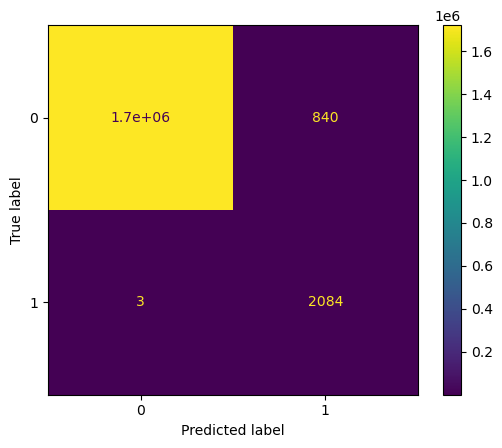

In [100]:
print(classification_report(y_test, preds3))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, preds3))
disp.plot()
plt.show()

In [101]:
X_test.Prediction = preds3
X_test[(X_test.Fraud == 1) & (X_test.Prediction == 1)].Amount.sum()

/var/folders/4k/mwht33nx1y3874hyv4dvd6x00000gn/T/ipykernel_7167/3955559077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.Prediction = preds3


165954.37

In [102]:
X_test[(X_test.Fraud == 1)].Amount.sum()

165754.86